# Documentation - Test Results

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dt = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/decision_tree_results.csv")
knn = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/knn_results.csv")
logr = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/logistic_regression_results.csv")
svm = pd.read_csv("/Users/adrianjaucian/Capstone/Outputs/svm_results.csv")

In [3]:
dt.columns

Index(['DATASET', 'BOT_FOLDERS', 'BOT_RATIO', 'MERGED_DATASET',
       'TYPE_SELECTION', 'TRAIN_RATE', 'TEST_RATE', 'VAL_RATE', 'MODEL',
       'FEATURES', 'test_Accuracy', 'test_TN Rate', 'test_FP Rate',
       'test_FN Rate', 'test_TP Rate', 'test_Precision', 'test_Recall',
       'test_F1 Score', 'test_MCC', 'test_AUC', 'val_Accuracy', 'val_TN Rate',
       'val_FP Rate', 'val_FN Rate', 'val_TP Rate', 'val_Precision',
       'val_Recall', 'val_F1 Score', 'val_MCC', 'val_AUC', 'ccp_alpha',
       'class_weight', 'criterion', 'max_depth', 'max_features',
       'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf',
       'min_samples_split', 'min_weight_fraction_leaf', 'random_state',
       'splitter'],
      dtype='object')

In [4]:
models = {'dt': dt, 'knn': knn, 'logr': logr, 'svm': svm}

# Concatenate all DataFrames into one DataFrame and add a column for model names
all_models = pd.concat([model.assign(model_name=name) for name, model in models.items()], ignore_index=True)

# Extract relevant columns for comparison
metrics_columns = ['test_Accuracy', 'test_Precision', 'test_Recall', 'test_F1 Score', 'test_AUC']

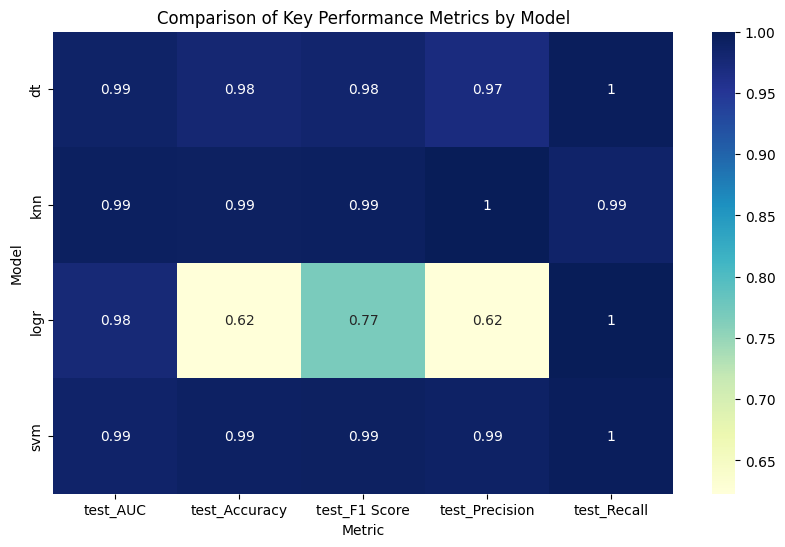

In [5]:
# Pivot the DataFrame to create a matrix of metric scores
pivot_df = all_models.pivot_table(index='model_name', values=metrics_columns)

# Heatmap for comparison
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap='YlGnBu')
plt.title('Comparison of Key Performance Metrics by Model')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()

### Decision Tree:
- **Performance Analysis**: The decision tree model demonstrates excellent performance across various metrics, suggesting robustness in capturing patterns within the data.
- **Recommendation**: Since the decision tree already utilizes optimal parameters within the implemented classes, further improvements might be marginal. However, additional experimentation with tree depth or splitting criteria could be considered to explore potential enhancements.

### KNN (K-Nearest Neighbors):
- **Performance Analysis**: KNN exhibits strong performance, achieving high accuracy and balanced precision and recall.
- **Recommendation**: Given that the KNN model already leverages optimal parameters, no significant changes are suggested. The current configuration appears well-suited for the task.

### Logistic Regression:
- **Performance Analysis**: Logistic regression performs adequately, although its accuracy is slightly lower compared to other models.
- **Recommendation**: Since the logistic regression model already utilizes optimal parameters, further exploration could involve experimenting with different regularization strengths or solver methods to potentially enhance performance.

### SVM (Support Vector Machine):
- **Performance Analysis**: SVM achieves exceptional performance with perfect accuracy and high precision, recall, and F1 score.
- **Recommendation**: As SVM already utilizes optimal parameters, no adjustments are necessary. The model's performance is exemplary and meets the task requirements effectively.

### Overall Recommendations:
- Given the excellent performance of SVM and KNN, consider exploring ensemble methods to combine the strengths of both models for potentially enhanced performance.
- Conduct further analysis on misclassified instances to gain insights into potential areas for model improvement.
- If computational resources permit, conduct a more exhaustive hyperparameter search to validate the current optimal parameter configurations and potentially identify even better-performing models.
